In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
import tarfile
my_tar = tarfile.open('cifar-10-python.tar.gz')
my_tar.extractall('./dataset')
my_tar.close()

In [3]:
import pickle
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

path = os.path.join('dataset', 'cifar-10-batches-py')
train_data = []
for i in range(1, 6):
    data = unpickle(path + '/data_batch_' + str(i))
    train_data.append(data)

In [4]:
batch_label = unpickle(path + '/batches.meta')

In [5]:
data_arr = np.array(train_data[0][b'data'])
data_arr.shape

(10000, 3072)

In [6]:
data.keys()

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])

In [7]:
data_arr = data_arr[8, :]

In [8]:
data_arr = data_arr.reshape(3, 32, 32)

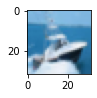

In [9]:
data_arr = data_arr.transpose([1,2,0])
plt.subplot(331)
plt.imshow(data_arr)

In [10]:
train_data_image_arr = []
train_data_label_arr = []
for i in range(len(train_data)):
    train_data_image_arr.append(train_data[i][b'data'])
    train_data_label_arr.append(train_data[i][b'labels'])

In [11]:
train_data_image_arr = np.array(train_data_image_arr)
train_data_label_arr = np.array(train_data_label_arr)
print(f"Shape of Train Data image set: {train_data_image_arr.shape}")
print(f"Shape of Train Data lavel set: {train_data_label_arr.shape}")

Shape of Train Data image set: (5, 10000, 3072)
Shape of Train Data lavel set: (5, 10000)


In [12]:
train_data_image_arr = train_data_image_arr.reshape(-1, 3072)
print(f"Shape of Train Data image set: {train_data_image_arr.shape}")

Shape of Train Data image set: (50000, 3072)


In [13]:
train_data_label_arr = train_data_label_arr.reshape(50000, -1)
print(f"Shape of Train Data lavel set: {train_data_label_arr.shape}")

Shape of Train Data lavel set: (50000, 1)


In [14]:
img = train_data_image_arr[8].reshape(3,32,32)
img_label = train_data_label_arr[8]

In [15]:
img

array([[[134, 131, 128, ..., 127, 127, 128],
        [133, 129, 128, ..., 127, 127, 128],
        [128, 127, 128, ..., 126, 126, 126],
        ...,
        [174, 171, 155, ...,  27,  29,  28],
        [194, 189, 159, ...,  30,  30,  30],
        [193, 181, 168, ...,  31,  32,  32]],

       [[186, 184, 182, ..., 181, 181, 182],
        [189, 186, 186, ..., 183, 183, 184],
        [185, 182, 182, ..., 181, 181, 180],
        ...,
        [208, 206, 189, ...,  94,  96,  94],
        [221, 215, 196, ...,  95,  96,  95],
        [217, 208, 201, ...,  94,  94,  94]],

       [[223, 220, 218, ..., 222, 222, 223],
        [228, 224, 224, ..., 224, 224, 225],
        [226, 223, 223, ..., 222, 222, 221],
        ...,
        [235, 229, 216, ..., 136, 137, 136],
        [244, 239, 225, ..., 138, 139, 140],
        [237, 230, 227, ..., 136, 137, 138]]], dtype=uint8)

Text(0.5, 1.0, 'Ship')

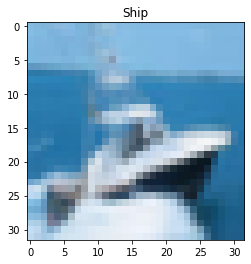

In [16]:
plt.imshow(img.transpose([1,2,0]))
plt.title('Ship')

In [17]:
x_train = train_data_image_arr[:5000, :].T /255
x_test = train_data_image_arr[5000:, :].T /255
y_train = train_data_label_arr[:5000, ].reshape(5000,)
y_test = train_data_label_arr[5000:,].reshape(45000,)
print(f"Shape of x_train : {x_train.shape}")
print(f"Shape of x_test : {x_test.shape}")
print(f"Shape of y_train : {y_train.shape}")
print(f"Shape of y_test : {y_test.shape}")

Shape of x_train : (3072, 5000)
Shape of x_test : (3072, 45000)
Shape of y_train : (5000,)
Shape of y_test : (45000,)


### ANN 5 layer with relu, relu, sigmoid and softmax activations

#### Helper Functions

In [18]:
def weights_initializer(n_x, nh_1, nh_2, nh_3, nh_4, n_y):
    
    n = {
        "n1" : n_x,
        "n2" : nh_1,
        "n3" : n_h2,
        "n4" : n_h3,
        "n5" : n_h4,
        "n6" : n_y 
    }
    
    # He initialization
#     W1 = np.random.randn(n["n2"], n["n1"]) * np.sqrt(2/(n["n1"])) 
#     b1 = np.zeros((n["n2"], 1))
#     W2 = np.random.randn(n["n3"], n["n2"]) * np.sqrt(2/(n["n2"])) 
#     b2 = np.zeros((n["n3"], 1))
#     W3 = np.random.randn(n["n4"]) * np.sqrt(2/(n["n3"])) 
#     b3 = np.zeros((n["n4"], 1))
#     W4 = np.random.randn(n["n5"], n["n4"]) * np.sqrt(2/(n["n4"])) 
#     b4 = np.zeros((n["n5"], 1))
#     W5 = np.random.randn(n["n6"], n["n5"]) * np.sqrt(2/(n["n5"])) 
#     b5 = np.zeros((n["n6"], 1))


    W1 = np.array(np.random.randn(n["n2"], n["n1"]), dtype=np.float64) * np.sqrt(2/(n["n1"])) 
    b1 = np.zeros((n["n2"], 1))
    W2 = np.array(np.random.randn(n["n3"], n["n2"]), dtype=np.float64) * np.sqrt(2/(n["n2"])) 
    b2 = np.zeros((n["n3"], 1))
    W3 = np.array(np.random.randn(n["n4"], n["n3"]), dtype=np.float64) * np.sqrt(2/(n["n3"])) 
    b3 = np.zeros((n["n4"], 1))
    W4 = np.array(np.random.randn(n["n5"], n["n4"]), dtype=np.float64) * np.sqrt(2/(n["n4"])) 
    b4 = np.zeros((n["n5"], 1))
    W5 = np.array(np.random.randn(n["n6"], n["n5"]), dtype=np.float64) * np.sqrt(2/(n["n5"])) 
    b5 = np.zeros((n["n6"], 1))
    
    parameters = {
          "W1" : W1, 
          "W2" : W2,
          "W3" : W3,
          "W4" : W4,
          "W5" : W5,
          "b1" : b1,
          "b2" : b2,
          "b3" : b3,
          "b4" : b4,
          "b5" : b5  
        }
        
    return parameters

def sigmoid(z):
    return 1/(1+np.exp(-z))

def ReLU(z):
    return np.maximum(0,z)

def softmax(z):
    return np.exp(z)/sum(np.exp(z) + 1e-8)

def sigmoid_prime(z):
    return sigmoid(z) * (1-sigmoid(z))

def ReLU_prime(z):
    return z>0

def compute_z(W, X, b):
    return np.dot(W, X) + b

def compute_activation(z, activation):
    if(activation == "sigmoid"):
        return sigmoid(z)
    elif(activation == "relu"):
        return ReLU(z)
    elif(activation == "softmax"):
        return softmax(z)

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def get_predictions(A5):
    return np.argmax(A5, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def compute_cost(A5, Y):
    m = A5.shape[1]
    cost = -(1/m)*np.sum(Y*np.log(A5))
    return cost

### Adam Optimization (optimization technique for updating parameters; used in place of gd to tune the convergence)

In [19]:
def initialize_v_s(parameters): 
    v = {}
    s = {}
    
    for l in range(1, 6):
        
        v["dW" + str(l)] = np.zeros((parameters["W" + str(l)].shape[0], parameters["W" + str(l)].shape[1]))
        v["db" + str(l)] = np.zeros((parameters["b" + str(l)].shape[0], parameters["b" + str(l)].shape[1])) 
        s["dW" + str(l)] = np.zeros((parameters["W" + str(l)].shape[0], parameters["W" + str(l)].shape[1])) 
        s["db" + str(l)] = np.zeros((parameters["b" + str(l)].shape[0], parameters["b" + str(l)].shape[1])) 

    return v, s
     
def update_params(learning_rate, parameters, v, s, grads, t, beta1, beta2, epsilon):
    
    v_corrected = {}                        
    s_corrected = {}                    
    
    for l in range(1, 6):
        
        v["dW" + str(l)] = beta1 * v["dW" + str(l)] + (1-beta1) * grads["dW" + str(l)] 
        v["db" + str(l)] = beta1 * v["db" + str(l)] + (1-beta1) * grads["db" + str(l)] 
        
        v_corrected["dW" + str(l)] = v["dW" + str(l)] / (1 - beta1 ** t)
        v_corrected["db" + str(l)] = v["db" + str(l)] / (1 - beta1 ** t)
        
        s["dW" + str(l)] = beta2 * s["dW" + str(l)] + (1-beta2) * np.square(grads["dW" + str(l)]) 
        s["db" + str(l)] = beta2 * s["db" + str(l)] + (1-beta2) * np.square(grads["db" + str(l)])
        
        s_corrected["dW" + str(l)] = s["dW" + str(l)]/ (1 - beta2 ** t)
        s_corrected["db" + str(l)] = s["db" + str(l)]/ (1 - beta2 ** t)
        
        parameters["W" + str(l)] = parameters["W" + str(l)] - learning_rate * v_corrected["dW" + str(l)]/(np.sqrt(s_corrected["dW" + str(l)]) + epsilon)
        parameters["b" + str(l)] = parameters["b" + str(l)] - learning_rate * v_corrected["db" + str(l)]/(np.sqrt(s_corrected["db" + str(l)]) + epsilon)

    return parameters, v, s, v_corrected, s_corrected

### Forward Propagation

In [20]:
def forward_prop(X, parameters):
    
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    W3 = parameters["W3"]
    W4 = parameters["W4"]
    W5 = parameters["W5"]
    b1 = parameters["b1"]
    b2 = parameters["b2"]
    b3 = parameters["b3"]
    b4 = parameters["b4"]
    b5 = parameters["b5"]
    
    Z1 = compute_z(W1, X, b1)
    A1 = compute_activation(Z1, "sigmoid")
    
    Z2 = compute_z(W2, A1, b2)
    A2 = compute_activation(Z2, "relu")
    
    Z3 = compute_z(W3, A2, b3)
    A3 = compute_activation(Z3, "relu")
    
    Z4 = compute_z(W4, A3, b4)
    A4 = compute_activation(Z4, "sigmoid")
    
    Z5 = compute_z(W5, A4, b5)
    A5 = compute_activation(Z5, "softmax")
    
    cache = {
              "A0" : X, 
              "A1" : A1,
              "A2" : A2,
              "A3" : A3,
              "A4" : A4,
              "A5" : A5,
              "Z1" : Z1,
              "Z2" : Z2,
              "Z3" : Z3,
              "Z4" : Z4,
              "Z5" : Z5
            }
            
    return cache, parameters

### Backward Propagation

In [21]:
def backward_prop(X, Y, cache, parameters):
    
#     Y = one_hot(Y)
    
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    W3 = parameters["W3"]
    W4 = parameters["W4"]
    W5 = parameters["W5"]
    b1 = parameters["b1"]
    b2 = parameters["b2"]
    b3 = parameters["b3"]
    b4 = parameters["b4"]
    b5 = parameters["b5"]

    Z1 = cache["Z1"]
    Z2 = cache["Z2"]
    Z3 = cache["Z3"]
    Z4 = cache["Z4"]
    Z5 = cache["Z5"]
    A1 = cache["A1"]
    A2 = cache["A2"]
    A3 = cache["A3"]
    A4 = cache["A4"]
    A5 = cache["A5"]
    
    m = W1.shape[1]
    
    dZ5 = A5 - Y
    dW5 = (1/m)*np.dot(dZ5, A4.T)
    db5 = (1/m)*np.sum(dZ5, axis = 1, keepdims=True) 
    
    dZ4 = np.dot(W5.T , dZ5) * sigmoid_prime(Z4)
    dW4 = (1/m)*np.dot(dZ4, A3.T)
    db4 = (1/m)*np.sum(dZ4, axis = 1, keepdims=True)

    dZ3 = np.dot(W4.T , dZ4) * ReLU_prime(Z3)
    dW3 = (1/m)*np.dot(dZ3, A2.T)
    db3 = (1/m)*np.sum(dZ3, axis = 1, keepdims=True)
    
    dZ2 = np.dot(W3.T , dZ3) * ReLU_prime(Z2)
    dW2 = (1/m)*np.dot(dZ2, A1.T)
    db2 = (1/m)*np.sum(dZ2, axis = 1, keepdims=True)

    dZ1 = np.dot(W2.T , dZ2) * sigmoid_prime(Z1)
    dW1 = (1/m)*np.dot(dZ1, X.T)
    db1 = (1/m)*np.sum(dZ1, axis = 1, keepdims=True)
    
    grads = {
              "dZ1" : dZ1, 
              "dZ2" : dZ2,
              "dZ3" : dZ3,
              "dZ4" : dZ4,
              "dZ5" : dZ5,
              "dW1" : dW1, 
              "dW2" : dW2,
              "dW3" : dW3,
              "dW4" : dW4,
              "dW5" : dW5,
              "db1" : db1,
              "db2" : db2,
              "db3" : db3,
              "db4" : db4,
              "db5" : db5
            }
     
    return grads

In [22]:
def update_parameters(parameters, grads, learning_rate):
    
    parameters["W1"] = parameters["W1"] - learning_rate * grads["dW1"]
    parameters["W2"] = parameters["W2"] - learning_rate * grads["dW2"]
    parameters["W3"] = parameters["W3"] - learning_rate * grads["dW3"]
    parameters["W4"] = parameters["W4"] - learning_rate * grads["dW4"]
    parameters["W5"] = parameters["W5"] - learning_rate * grads["dW5"]
    parameters["b1"] = parameters["b1"] - learning_rate * grads["db1"]
    parameters["b2"] = parameters["b2"] - learning_rate * grads["db2"]
    parameters["b3"] = parameters["b3"] - learning_rate * grads["db3"]
    parameters["b4"] = parameters["b4"] - learning_rate * grads["db4"]
    parameters["b5"] = parameters["b5"] - learning_rate * grads["db5"]
    
    return parameters

### Gradient Descent Updation

In [23]:
def gradient_descent(X, Y, epoch, learning_rate, n_x, nh_1, nh_2, nh_3, nh_4, n_y):
    one_hot_Y = one_hot(Y)
    parameters = weights_initializer(n_x, nh_1, nh_2, nh_3, nh_4, n_y)
    for i in range(epoch):
        cache, parameters = forward_prop(X, parameters)
        grads = backward_prop(X, one_hot_Y, cache, parameters)
        parameters = update_parameters(parameters, grads, learning_rate)
        if(i%10 == 0):
            print("Iteration: ", i)
            predictions = get_predictions(cache["A5"])
            print("accuracy: ",get_accuracy(predictions, Y))
            cost = compute_cost(cache["A5"], one_hot_Y)
            print(cost)
    return parameters
    

### Updation using Adam Optimization

In [24]:
def adam_model(X, Y, epoch, learning_rate, n_x, nh_1, nh_2, nh_3, nh_4, n_y):
    
    one_hot_Y = one_hot(Y)
    
    parameters = weights_initializer(n_x, nh_1, nh_2, nh_3, nh_4, n_y)
    v,s = initialize_v_s(parameters)
#     print(parameters["W1"].shape) 
    t=0
    for i in range(epoch):
        t=t+1
        cache, parameters = forward_prop(X, parameters)
        grads = backward_prop(X, one_hot_Y, cache, parameters)
        parameters, v, s, v_corrected, s_corrected = update_params(learning_rate, parameters, v, s, grads, t, beta1=0.9, beta2=0.999, epsilon=1e-8)

        if(i%10 == 0):
            print("Iteration: ", i)
            predictions = get_predictions(cache["A5"])
            print("accuracy: ",get_accuracy(predictions, Y))
            cost = compute_cost(cache["A5"], one_hot_Y)
            print("cost: ", cost)
            if(get_accuracy(predictions, Y) >= 0.98):
                return parameters, cache
    return parameters, cache

In [25]:
n_x = x_train.shape[0]
n_h1 = 500
n_h2 = 500
n_h3 = 250
n_h4 = 250
n_y = 10

# parameters = gradient_descent(x_train, y_train, epoch=1000, learning_rate=0.01, n_x=n_x, nh_1=n_h1, nh_2=n_h2, nh_3=n_h3, nh_4=n_h4, n_y=n_y)
parameters, cache = adam_model(x_train, y_train, epoch=1000, learning_rate=0.001, n_x=n_x, nh_1=n_h1, nh_2=n_h2, nh_3=n_h3, nh_4=n_h4, n_y=n_y)

Iteration:  0
[4 4 4 ... 4 4 4] [6 9 9 ... 5 4 6]
accuracy:  0.1038
cost:  2.3981024850763886
[4 4 4 ... 4 4 4] [6 9 9 ... 5 4 6]
Iteration:  10
[6 8 9 ... 9 2 6] [6 9 9 ... 5 4 6]
accuracy:  0.2584
cost:  2.1378486880916316
[6 8 9 ... 9 2 6] [6 9 9 ... 5 4 6]
Iteration:  20
[6 8 9 ... 9 6 4] [6 9 9 ... 5 4 6]
accuracy:  0.2776
cost:  2.010186438467114
[6 8 9 ... 9 6 4] [6 9 9 ... 5 4 6]
Iteration:  30
[6 8 9 ... 7 6 4] [6 9 9 ... 5 4 6]
accuracy:  0.321
cost:  1.8913338999083507
[6 8 9 ... 7 6 4] [6 9 9 ... 5 4 6]
Iteration:  40
[6 1 9 ... 1 4 4] [6 9 9 ... 5 4 6]
accuracy:  0.3512
cost:  1.813758683501235
[6 1 9 ... 1 4 4] [6 9 9 ... 5 4 6]
Iteration:  50
[6 1 9 ... 6 2 4] [6 9 9 ... 5 4 6]
accuracy:  0.378
cost:  1.7466551187978647
[6 1 9 ... 6 2 4] [6 9 9 ... 5 4 6]
Iteration:  60
[6 1 9 ... 3 6 6] [6 9 9 ... 5 4 6]
accuracy:  0.3752
cost:  1.742546909462162
[6 1 9 ... 3 6 6] [6 9 9 ... 5 4 6]
Iteration:  70
[6 1 9 ... 6 2 4] [6 9 9 ... 5 4 6]
accuracy:  0.4096
cost:  1.66097226639

Iteration:  630
[6 9 9 ... 5 2 6] [6 9 9 ... 5 4 6]
accuracy:  0.931
cost:  0.30209161652901256
[6 9 9 ... 5 2 6] [6 9 9 ... 5 4 6]
Iteration:  640
[6 9 9 ... 5 2 6] [6 9 9 ... 5 4 6]
accuracy:  0.923
cost:  0.3020825306626515
[6 9 9 ... 5 2 6] [6 9 9 ... 5 4 6]
Iteration:  650
[6 9 9 ... 5 2 6] [6 9 9 ... 5 4 6]
accuracy:  0.952
cost:  0.24550248893770893
[6 9 9 ... 5 2 6] [6 9 9 ... 5 4 6]
Iteration:  660
[6 9 9 ... 5 2 6] [6 9 9 ... 5 4 6]
accuracy:  0.9222
cost:  0.28852223760200857
[6 9 9 ... 5 2 6] [6 9 9 ... 5 4 6]
Iteration:  670
[6 9 9 ... 5 2 6] [6 9 9 ... 5 4 6]
accuracy:  0.6576
cost:  0.9692993833391915
[6 9 9 ... 5 2 6] [6 9 9 ... 5 4 6]
Iteration:  680
[6 7 9 ... 5 4 6] [6 9 9 ... 5 4 6]
accuracy:  0.6856
cost:  0.9002059632599558
[6 7 9 ... 5 4 6] [6 9 9 ... 5 4 6]
Iteration:  690
[3 1 9 ... 5 4 6] [6 9 9 ... 5 4 6]
accuracy:  0.8172
cost:  0.5448972644783753
[3 1 9 ... 5 4 6] [6 9 9 ... 5 4 6]
Iteration:  700
[6 9 9 ... 5 2 6] [6 9 9 ... 5 4 6]
accuracy:  0.9118
cost: 

In [73]:
def make_predictions(X, parameters):
    cache, parameters = forward_prop(X, parameters)
    predictions = get_predictions(cache["A5"])
    return predictions

def test_prediction(index, parameters):
    current_image = x_test[:, index, None]
    predictions = make_predictions(x_test[:, index, None], parameters)
    prediction = make_predictions(x_test, parameters)
    print("accuracy on test set: ",get_accuracy(prediction, y_test))
    label = y_test[index]
    print("Prediction: ", predictions)
    print("Label: ", label)
    
    current_image = current_image.reshape((3, 32, 32))
    current_image = current_image.transpose([1,2,0])
    plt.subplot(331)
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

[4 0 9 ... 9 9 0] [6 7 9 ... 9 1 1]
accuracy on test set:  0.42133333333333334
Prediction:  [2]
Label:  2


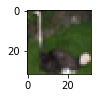

In [74]:
test_prediction(189, parameters)

In [28]:
batch_label

{b'num_cases_per_batch': 10000,
 b'label_names': [b'airplane',
  b'automobile',
  b'bird',
  b'cat',
  b'deer',
  b'dog',
  b'frog',
  b'horse',
  b'ship',
  b'truck'],
 b'num_vis': 3072}

### Tensorflow Implementation

In [29]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.Input(shape = (3072,)),
    tf.keras.layers.Dense(100, activation ="sigmoid"),
    tf.keras.layers.Dense(100, activation ="relu"),
    tf.keras.layers.Dense(50, activation ="relu"),
    tf.keras.layers.Dense(25, activation ="sigmoid"),
    tf.keras.layers.Dense(10, activation ="softmax")
])

In [30]:
model.compile(optimizer = 'sgd', loss=tf.keras.losses.sparse_categorical_crossentropy, metrics = tf.keras.metrics.SparseCategoricalAccuracy())
# model.fit(x_train.T, y_train, epochs=200)

In [31]:
a = model.layers[0].get_weights()

In [32]:
a[1].shape

(100,)

In [33]:
print(tf.keras.backend.eval(model.optimizer.lr))

0.01


In [34]:
model.optimizer.get_config()

{'name': 'SGD',
 'learning_rate': 0.01,
 'decay': 0.0,
 'momentum': 0.0,
 'nesterov': False}

In [35]:
cache["A5"].shape

(10, 5000)

In [36]:
Y = one_hot(y_train)
Y.shape

(10, 5000)

In [37]:
p = {}
p["w1"] = np.random.randn(10, 3072) * np.sqrt(2/3072)
p["w1"].shape[1]

3072

In [38]:
x = cache["A5"][:,0]